# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

In [73]:
# Set the API base URL

    

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | campbellton
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | san luis de la loma
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | rabo de peixe
Processing Record 12 of Set 1 | darwin
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ta`u
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | khovd
Processing Record 22 of Set 1 | kerike

Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | aripuana
Processing Record 42 of Set 4 | pemba
Processing Record 43 of Set 4 | sishilichengzi
City not found. Skipping...
Processing Record 44 of Set 4 | kudahuvadhoo
Processing Record 45 of Set 4 | dokkum
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | nshamba
Processing Record 48 of Set 4 | lepsy
Processing Record 49 of Set 4 | luganville
Processing Record 0 of Set 5 | pandan
Processing Record 1 of Set 5 | fangshan
Processing Record 2 of Set 5 | luena
Processing Record 3 of Set 5 | puerto lempira
Processing Record 4 of Set 5 | cat ba
City not found. Skipping...
Processing Record 5 of Set 5 | minas de matahambre
City not found. Skipping...
Processing Record 6 of Set 5 | bereznik
Processing Record 7 of Set 5 | bam
Processing Record 8 of Set 5 | craig
Processing Record 9 of Set 5 | general luna
Processing Record 10 of Set 5 | hovd
Processing Record 11 of Set 5 | stanley
Processing Record 12 of Set

Processing Record 27 of Set 8 | malango
Processing Record 28 of Set 8 | merizo village
Processing Record 29 of Set 8 | sil-li
Processing Record 30 of Set 8 | youhao
Processing Record 31 of Set 8 | puerto baquerizo moreno
Processing Record 32 of Set 8 | minas de marcona
Processing Record 33 of Set 8 | makeni
Processing Record 34 of Set 8 | san jose del cabo
Processing Record 35 of Set 8 | marsabit
Processing Record 36 of Set 8 | cabedelo
Processing Record 37 of Set 8 | harstad
Processing Record 38 of Set 8 | lobujya
Processing Record 39 of Set 8 | langxiang
Processing Record 40 of Set 8 | nova xavantina
Processing Record 41 of Set 8 | ternate
Processing Record 42 of Set 8 | elamanchili
Processing Record 43 of Set 8 | guajara mirim
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set 8 | ijuw
City not found. Skipping...
Processing Record 46 of Set 8 | arrifes
Processing Record 47 of Set 8 | isola di capo rizzuto
Processing Record 48 of Set 8 | portland
Processing Record 4

Processing Record 16 of Set 12 | amga
Processing Record 17 of Set 12 | homer
Processing Record 18 of Set 12 | miquelon
Processing Record 19 of Set 12 | al bayda'
Processing Record 20 of Set 12 | sao joao da barra
Processing Record 21 of Set 12 | puerto deseado
Processing Record 22 of Set 12 | amahai
Processing Record 23 of Set 12 | san pedro pochutla
Processing Record 24 of Set 12 | zhangye
Processing Record 25 of Set 12 | zelenokumsk
Processing Record 26 of Set 12 | dubbo
Processing Record 27 of Set 12 | egilsstadir
Processing Record 28 of Set 12 | erenhot
Processing Record 29 of Set 12 | igboho
Processing Record 30 of Set 12 | kamloops
Processing Record 31 of Set 12 | cidreira
Processing Record 32 of Set 12 | maracacume
Processing Record 33 of Set 12 | wad az zaki
Processing Record 34 of Set 12 | tangalle
Processing Record 35 of Set 12 | toropets
Processing Record 36 of Set 12 | port macquarie
Processing Record 37 of Set 12 | trairi
Processing Record 38 of Set 12 | atar
Processing Re

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-24.77,99,100,4.01,RU,1701895499
1,port-aux-francais,-49.3500,70.2167,4.75,85,100,8.98,TF,1701895499
2,campbellton,48.0075,-66.6727,-6.75,78,10,3.72,CA,1701895499
3,anadyr,64.7500,177.4833,-20.56,76,100,15.00,RU,1701895499
4,edinburgh of the seven seas,-37.0676,-12.3116,14.35,76,10,8.10,SH,1701895499


In [76]:
import os 

# Create the directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Now try to save the CSV file
try:
    city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")
    print("CSV file has been created successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file has been created successfully.


In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-24.77,99,100,4.01,RU,1701895499
1,port-aux-francais,-49.3500,70.2167,4.75,85,100,8.98,TF,1701895499
2,campbellton,48.0075,-66.6727,-6.75,78,10,3.72,CA,1701895499
3,anadyr,64.7500,177.4833,-20.56,76,100,15.00,RU,1701895499
4,edinburgh of the seven seas,-37.0676,-12.3116,14.35,76,10,8.10,SH,1701895499


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

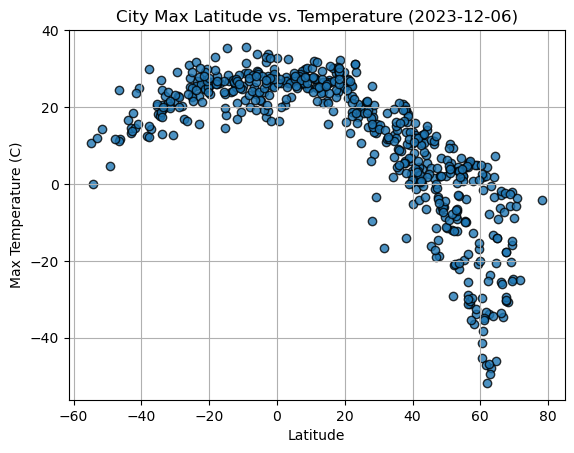

In [78]:
import matplotlib.pyplot as plt

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

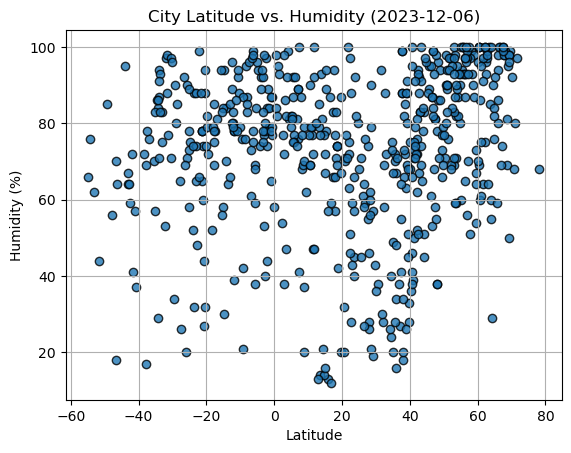

In [79]:
import matplotlib.pyplot as plt
import time

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],  # Adjusted to use the "Humidity" column
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")  # Adjusted label for humidity
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

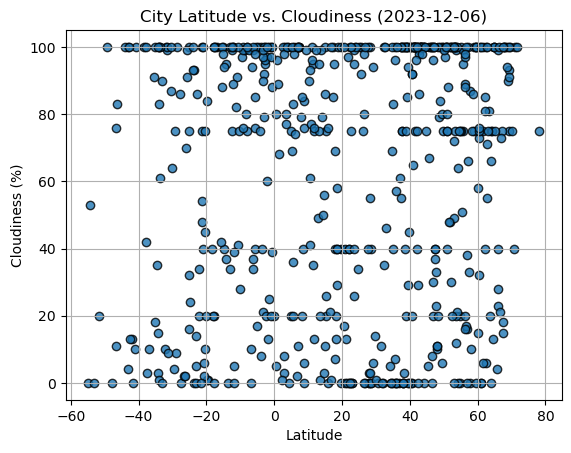

In [80]:
import matplotlib.pyplot as plt
import time

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],  # Use the "Cloudiness" column
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")  # Label for cloudiness
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")  # You may want to change the filename if saving different figures

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

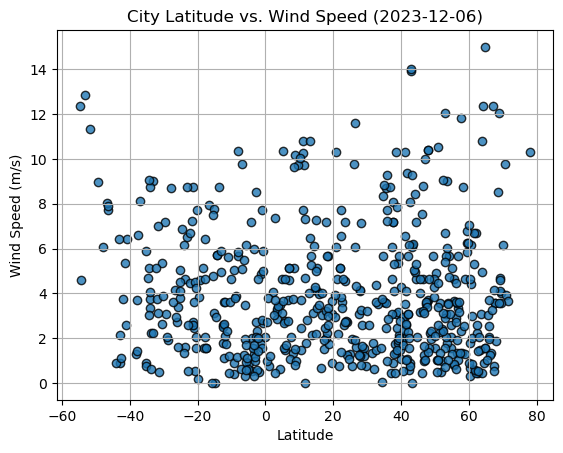

In [81]:
import matplotlib.pyplot as plt
import time

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],  # Use the "Wind Speed" column for the y-axis
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  # Label for wind speed
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")  # Change the filename to something like 'Fig3.png' to avoid overwriting

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    # Print out the r-squared value along with the plot.
    print(f"The r-squared is: {rvalue**2}")

# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


In [83]:
import pandas as pd

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-24.77,99,100,4.01,RU,1701895499
2,campbellton,48.0075,-66.6727,-6.75,78,10,3.72,CA,1701895499
3,anadyr,64.7500,177.4833,-20.56,76,100,15.00,RU,1701895499
5,jamestown,42.0970,-79.2353,0.85,76,100,5.66,US,1701895368
7,ilulissat,69.2167,-51.1000,-1.99,50,75,4.12,GL,1701895500


In [84]:
import pandas as pd

# Assuming 'city_data_df' is your main DataFrame with a column 'Lat' for latitude
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.75,85,100,8.98,TF,1701895499
4,edinburgh of the seven seas,-37.0676,-12.3116,14.35,76,10,8.10,SH,1701895499
6,pisco,-13.7000,-76.2167,24.03,64,0,8.75,PE,1701895499
11,darwin,-12.4611,130.8418,25.99,89,75,2.57,AU,1701895228
14,invercargill,-46.4000,168.3500,11.78,64,83,7.72,NZ,1701895500


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.69


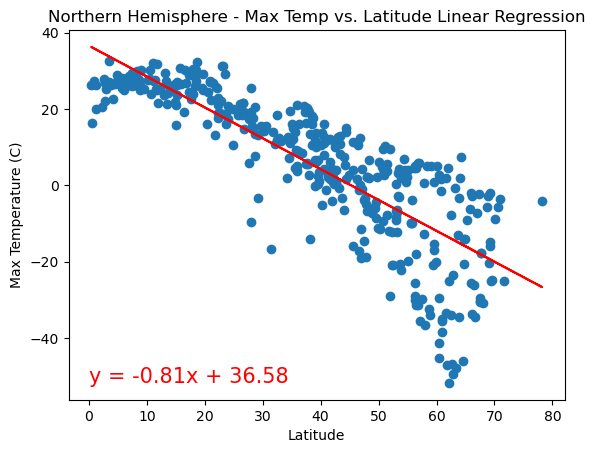

In [85]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on temperature vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, min(northern_hemi_df['Max Temp'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


The r-squared is: 0.39


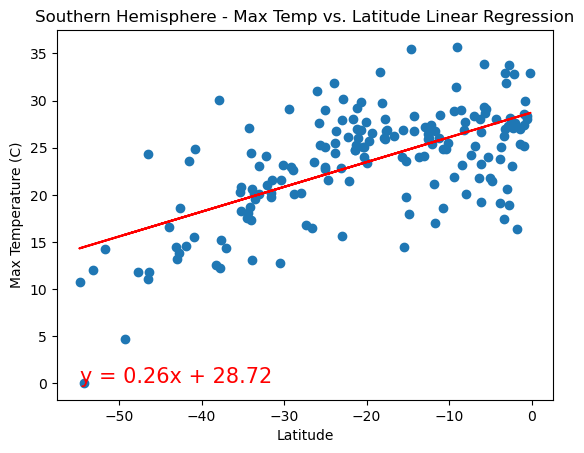

In [86]:
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on temperature vs. latitude
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Max Temp'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:Direction of Trends: The most striking difference is in the direction of the trends – temperatures decrease with increasing latitude in the Northern Hemisphere and increase with decreasing latitude in the Southern Hemisphere.
Magnitude of Temperature Change: Comparing how steeply temperatures change with latitude in each hemisphere can reveal differences in climatic patterns, possibly influenced by the distribution of land and sea and ocean currents.
R-squared Values: These values allow for a direct comparison of how strongly latitude predicts temperature in each hemisphere. A higher R-squared value in one hemisphere suggests a stronger correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08


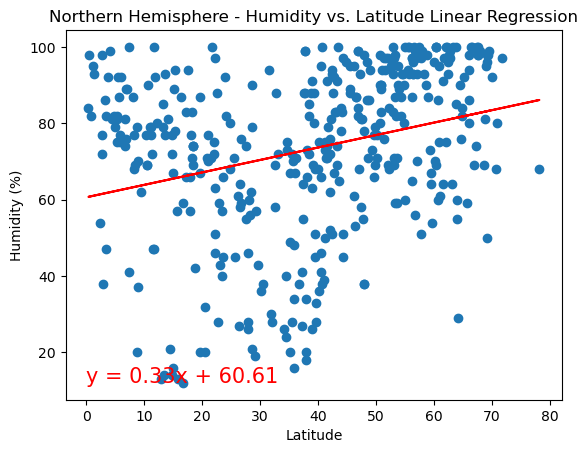

In [87]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on humidity vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, min(northern_hemi_df['Humidity'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


The r-squared is: 0.05


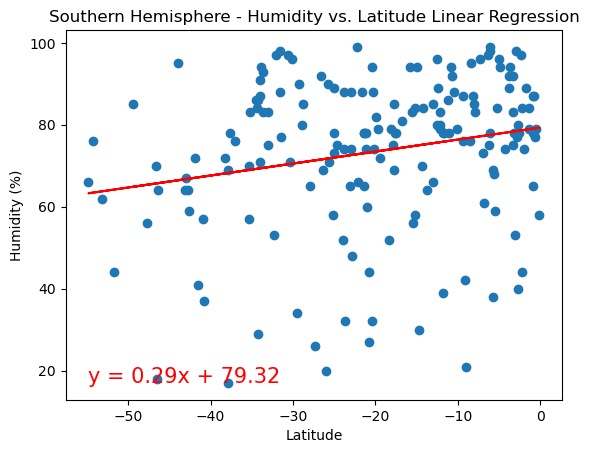

In [88]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on humidity vs. latitude
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Humidity'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:Contrasting Trends: Comparing the trends in both hemispheres can reveal how geographical differences (like the ratio of land to water) affect humidity levels. For instance, one hemisphere may show a stronger correlation between latitude and humidity than the other.
Magnitude of Humidity: Comparing actual humidity values across both hemispheres can indicate if one tends to be more humid at similar latitudes.
R-squared Values: These values allow for a direct comparison of how well latitude predicts humidity in each hemisphere. A higher R-squared value in one hemisphere would suggest a stronger correlation between latitude and humidity there.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01


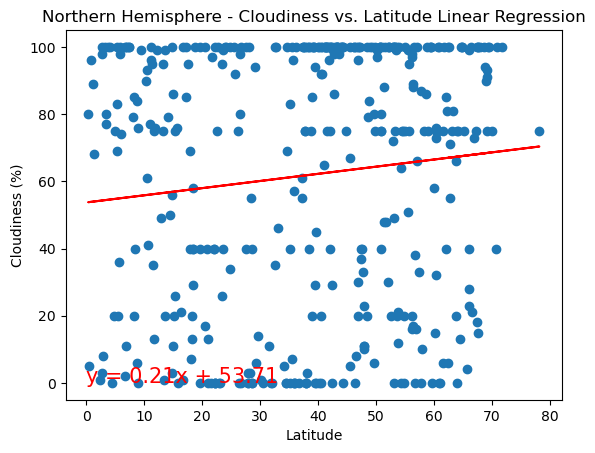

In [89]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, min(northern_hemi_df['Cloudiness'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()

The r-squared is: 0.05


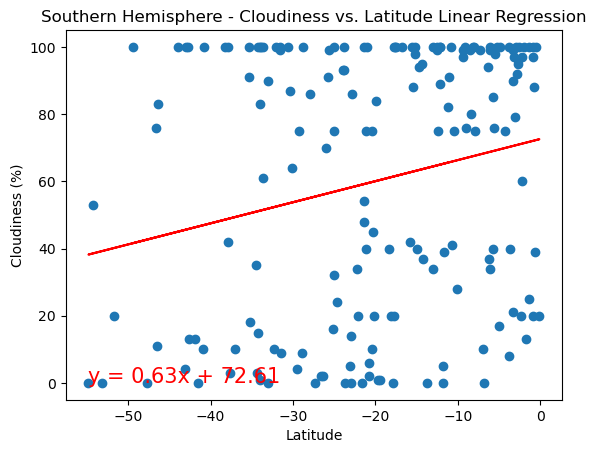

In [90]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Cloudiness'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:Trends and Differences: Comparing the regression trends for both hemispheres can reveal how geographic and oceanic differences influence cloud cover. One hemisphere may exhibit a more pronounced latitude-cloudiness relationship than the other.
Cloudiness Levels: The actual cloudiness percentages across both hemispheres can be compared to see if one hemisphere is generally cloudier than the other at similar latitudes.
R-squared Values: Comparing these values helps to understand which hemisphere shows a stronger correlation between latitude and cloudiness. A higher R-squared value in one hemisphere suggests a stronger predictive relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00


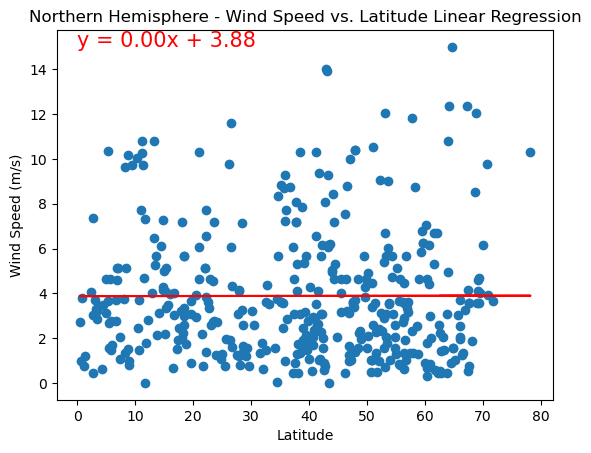

In [91]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, max(northern_hemi_df['Wind Speed'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


The r-squared is: 0.11


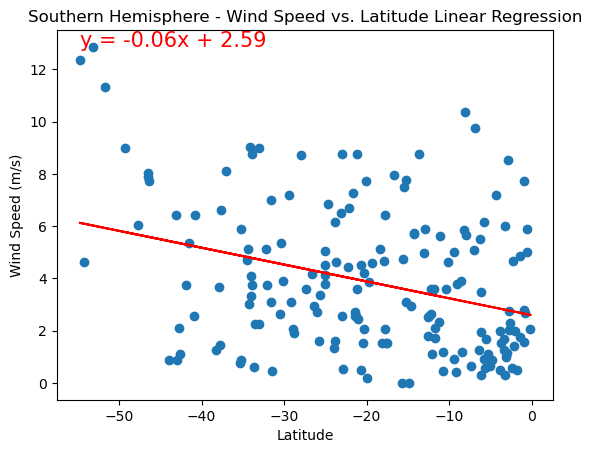

In [92]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Get the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the values for the regression line (y = mx + b)
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), max(southern_hemi_df['Wind Speed'])), fontsize=15, color="red")

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Show the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Differences in Trends: Comparing the trends in both hemispheres can reveal how geographic and climatic factors differently influence wind speed. For instance, the Northern Hemisphere, with more landmass, might show different wind speed patterns compared to the more ocean-dominated Southern Hemisphere.
Magnitude of Wind Speed: It’s also useful to compare the actual values of wind speed across the hemispheres. One hemisphere might consistently experience higher wind speeds at similar latitudes compared to the other.
R-squared Values: Comparing the R-squared values between the two hemispheres can indicate where latitude is a more significant predictor of wind speed.